# Lab 2: Graph visualization in Python


## Installing libraries then restarting jupyter

Before starting the lab, please install the following libraries: ipysigma, networkx, numpy, scikit-learn. 

After restart jupyter and continue the lab.

## Graph library in Python: NetworkX
We have seen many community detection algorithms today! Let's
test them on a real graph. 

1. Please check this tutorial and try to make a simple graph: https://networkx.org/documentation/stable/tutorial.html

In [2]:
import networkx as nx
from ipysigma import Sigma
import numpy as np

In [3]:
# Exercise 1: Construct a simple graph of 5 nodes and connect those 5 nodes with 7 edges.

#Adding Vertices
G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3])
G.add_node(4)

#Adding Edges
G.add_edges_from([(1, 2), (1, 3), (2, 3), (1, 4), (2, 4), (3, 4)])
G.add_edge(0, 1)
#e = (1, 2)
#G.add_edge(*e)  # unpack edge tuple*

#Using the graph
print(list(G.nodes))
print(list(G.edges))

[0, 1, 2, 3, 4]
[(0, 1), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


### Game of Thrones character interaction
You will find in the TP archive a dataset about the interaction of the characters in Game of Thrones, per season. Create a NetworkX graph from one of the seasons (e.g. season 1), adding also the weight of edges. Check if you have created if you created correctly the graph, for example like this:

print(G.number_of_nodes())

print(G.number_of_edges())

print(G.adj['NED']) # for the first season

For reading or writing a csv file, you can use the python csv library we saw last time.


In [4]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
print(list(G.nodes))
print(list(G.edges))

[1, 2]
[(1, 2)]


In [5]:
# Create the Game of Thrones graph from the csv files
import csv

def graph_from_file(filename_node, filename_edge):

    #Creation du graphe
    G = nx.Graph()

    #Lecture du fichier csv des noeuds
    csvfile = open(filename_node, newline=None)
    reader = csv.DictReader(csvfile)
    for row in reader:
        G.add_node(row['Id'], label = row['Label'], link= row['Link'])
    csvfile.close()

    #Lecture du fichier csv des edges
    csvfile = open(filename_edge, newline=None)
    reader = csv.DictReader(csvfile)
    for row in reader:
        G.add_edge(row['Source'], row['Target'], weight= int(row['Weight']))
    csvfile.close()

    return G

G = graph_from_file("data-GOT-EXT/got-s1-nodes.csv", "data-GOT-EXT/got-s1-edges.csv")
print(list(G.nodes))
print(list(G.edges))

print(G.number_of_nodes())
print(G.number_of_edges())
print(G.adj['NED']) # for the first season

['ADDAM_MARBRAND', 'AERYS', 'ARYA', 'BALON', 'BARRISTAN', 'BENJEN', 'BERIC', 'BOWEN_MARSH', 'BRAN', 'BRONN', 'CATELYN', 'CERSEI', 'COHOLLO', 'DAENERYS', 'DAREON', 'DOREAH', 'DROGO', 'GALBART_GLOVER', 'GARED', 'GENDRY', 'GREATJON_UMBER', 'GRENN', 'HODOR', 'HOSTER', 'HOT_PIE', 'HOUND', 'ILLYRIO', 'ILYN_PAYNE', 'IRRI', 'JAIME', 'JANOS', 'JAREMY_RYKKER', 'JEOR', 'JHIQUI', 'JOFFREY', 'JON', 'JON_ARRYN', 'JONOS_BRACKEN', 'JORAH', 'JORY_CASSEL', 'JOYEUSE', 'KEVAN', 'LANCEL', 'LEO_LEFFORD', 'LITTLEFINGER', 'LOMMY_GREENHANDS', 'LORAS', 'LUKE', 'LYANNA', 'LYSA', 'MAESTER_AEMON', 'MAESTER_LUWIN', 'MAGO', 'MARILLION', 'MASHA_HEDDLE', 'MELESSA', 'MERYN_TRANT', 'MHAEGEN', 'MORD', 'MOUNTAIN', 'MYCAH', 'MYRCELLA', 'NED', 'OLD_NAN', 'OSHA', 'OTHOR', 'PYCELLE', 'QOTHO', 'RAKHARO', 'RANDYLL', 'RAST', 'RENLY', 'RHAEGAR', 'RHAEGO', 'RICKARD_KARSTARK', 'RICKARD_STARK', 'RICKON', 'ROBB', 'ROBERT', 'ROBIN', 'RODRIK', 'ROOSE_BOLTON', 'ROS', 'RYGER_RIVERS', 'SAM', 'SANSA', 'SHAE', 'SHAGGA', 'STANNIS', 'STEFFON'

#### Exercises


Do the following exercises. Note that if you find the results a bit difficult to evaluate, you can remove less important nodes from the graph (such as nodes that interact with the least amount of other characters).

2. Compute communities using:
- the Louvain algorithm https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html, 
- clique percolation https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.kclique.k_clique_communities.html (experiment with different k values)
- the Girvan Newman algorithm https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html
- and label propagation https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.label_propagation.label_propagation_communities.html
3. We could suppose that there is a link between the house of the character (its family) and the community it belongs to. Do we observe this pattern in the previous communities? For this, we can check what are the great houses https://gameofthrones.fandom.com/wiki/Great_House .  
4. Create a new graph per season and retrieve the top 10 nodes according to a node centrality measure https://networkx.org/documentation/stable/reference/algorithms/centrality.html . Does the nodes'importance change over the seasons, is it important to observe the evolution of a graph over time?  
Plot the results for a few nodes over the seasons using matplotlib. Here is a small tutorial on how to do this: https://www.geeksforgeeks.org/how-to-plot-a-time-series-in-matplotlib/

In [6]:
## Solution for exercises above

In [7]:
def louvain(graph):
    return nx.community.louvain_communities(graph, seed=123)

print(louvain(G))

[{'IRRI', 'DAENERYS', 'DROGO', 'JHIQUI', 'RAKHARO', 'MAGO', 'COHOLLO', 'DOREAH', 'RHAEGO', 'VISERYS', 'JORAH', 'ILLYRIO', 'QOTHO'}, {'GARED'}, {'LOMMY_GREENHANDS', 'HOT_PIE'}, {'ROBERT', 'TOMMEN', 'NED', 'RICKARD_STARK', 'LORAS', 'STEFFON', 'MYCAH', 'ROOSE_BOLTON', 'JON_ARRYN', 'LANCEL', 'MOUNTAIN', 'HOUND', 'GENDRY', 'TOBHO_MOTT', 'LITTLEFINGER', 'SYRIO_FOREL', 'JANOS', 'ARYA', 'JORY_CASSEL', 'MHAEGEN', 'MERYN_TRANT', 'RENLY', 'SANSA', 'BERIC', 'BARRISTAN', 'PYCELLE', 'CERSEI', 'AERYS', 'LYANNA', 'MARILLION', 'ILYN_PAYNE', 'JOFFREY', 'JAIME', 'VARLY', 'RHAEGAR', 'VARYS', 'TOMARD', 'STANNIS'}, {'JOYEUSE', 'JONOS_BRACKEN', 'CATELYN', 'BRAN', 'RODRIK', 'GREATJON_UMBER', 'RICKON', 'BALON', 'ROS', 'RYGER_RIVERS', 'STEVRON_FREY', 'MAESTER_LUWIN', 'GALBART_GLOVER', 'RICKARD_KARSTARK', 'ROBB', 'HODOR', 'HOSTER', 'THEON', 'OSHA', 'WALDER', 'OLD_NAN'}, {'JON', 'DAREON', 'MAESTER_AEMON', 'RAST', 'GRENN', 'BENJEN', 'JEOR', 'RANDYLL', 'OTHOR', 'MELESSA', 'BOWEN_MARSH', 'SAM', 'LUKE', 'JAREMY_RYKKE

In [8]:
def clique_percolation(graph, k:int):
    return nx.community.k_clique_communities(graph, k)

c = list(clique_percolation(G, 5))
print(sorted(list(c[0])))

['AERYS', 'ARYA', 'BARRISTAN', 'BENJEN', 'BRAN', 'BRONN', 'CATELYN', 'CERSEI', 'DAENERYS', 'GREATJON_UMBER', 'HODOR', 'HOUND', 'ILYN_PAYNE', 'JAIME', 'JANOS', 'JEOR', 'JOFFREY', 'JON', 'JON_ARRYN', 'JORY_CASSEL', 'LANCEL', 'LITTLEFINGER', 'LORAS', 'LYSA', 'MAESTER_LUWIN', 'MARILLION', 'MERYN_TRANT', 'MORD', 'MOUNTAIN', 'MYCAH', 'NED', 'OSHA', 'PYCELLE', 'RENLY', 'ROBB', 'ROBERT', 'ROBIN', 'RODRIK', 'ROS', 'SANSA', 'STANNIS', 'THEON', 'TYRION', 'TYWIN', 'VARDIS_EGEN', 'VARYS', 'WALDER']


In [9]:
def girvan_newman(graph):
    return nx.community.girvan_newman(graph)

#Affichage du type de retour
print(type(girvan_newman(G)))

#Recuperation du dernier element
best_elem = None
best_mod = 0
for set in girvan_newman(G):
    if best_mod < nx.community.modularity(G, set, weight='weight', resolution=1):
        best_elem = set
        best_mod = nx.community.modularity(G, set, weight='weight', resolution=1)
    #print(f'Set - {set}')
print(best_elem)

<class 'generator'>
({'KEVAN', 'LEO_LEFFORD', 'ADDAM_MARBRAND'}, {'ROBERT', 'LORAS', 'NED', 'MYCAH', 'GREATJON_UMBER', 'JON_ARRYN', 'LANCEL', 'ROS', 'MOUNTAIN', 'HOUND', 'MAESTER_LUWIN', 'BENJEN', 'JEOR', 'LITTLEFINGER', 'ARYA', 'JANOS', 'RENLY', 'JORY_CASSEL', 'MERYN_TRANT', 'SANSA', 'JON', 'BARRISTAN', 'PYCELLE', 'BRAN', 'CERSEI', 'RODRIK', 'AERYS', 'LYANNA', 'MARILLION', 'ILYN_PAYNE', 'TYWIN', 'ROBB', 'HODOR', 'JOFFREY', 'JAIME', 'THEON', 'OSHA', 'CATELYN', 'TYRION', 'VARYS', 'STANNIS'}, {'BALON'}, {'BERIC'}, {'DAREON', 'RAST', 'GRENN', 'RANDYLL', 'BOWEN_MARSH', 'MELESSA', 'SAM', 'LUKE'}, {'MORD', 'VARDIS_EGEN', 'ROBIN', 'LYSA', 'BRONN'}, {'DAENERYS', 'IRRI', 'DROGO', 'MAGO', 'RAKHARO', 'COHOLLO', 'JHIQUI', 'DOREAH', 'VISERYS', 'RHAEGO', 'JORAH', 'ILLYRIO', 'QOTHO'}, {'GALBART_GLOVER', 'JONOS_BRACKEN'}, {'GARED'}, {'GENDRY', 'TOBHO_MOTT'}, {'JOYEUSE', 'WALDER', 'HOSTER', 'RYGER_RIVERS', 'STEVRON_FREY'}, {'LOMMY_GREENHANDS', 'HOT_PIE'}, {'JAREMY_RYKKER'}, {'MAESTER_AEMON'}, {'MASHA_H

In [10]:
def label_propagation(graph):
    return nx.community.label_propagation_communities(graph)

for commu in label_propagation(G):
    print(commu)

{'ROBERT', 'JONOS_BRACKEN', 'LORAS', 'MAESTER_AEMON', 'NED', 'RICKARD_STARK', 'TOMMEN', 'STEFFON', 'TOMARD', 'MYCAH', 'GREATJON_UMBER', 'LEO_LEFFORD', 'ROOSE_BOLTON', 'RICKON', 'JON_ARRYN', 'LANCEL', 'ROS', 'MOUNTAIN', 'HOUND', 'JAREMY_RYKKER', 'KEVAN', 'MAESTER_LUWIN', 'MORD', 'GENDRY', 'RICKARD_KARSTARK', 'ADDAM_MARBRAND', 'VARDIS_EGEN', 'BENJEN', 'JEOR', 'OTHOR', 'LITTLEFINGER', 'SYRIO_FOREL', 'TOBHO_MOTT', 'ARYA', 'JANOS', 'JORY_CASSEL', 'LYSA', 'MERYN_TRANT', 'MHAEGEN', 'RENLY', 'SANSA', 'BERIC', 'OLD_NAN', 'JON', 'MASHA_HEDDLE', 'SHAE', 'BARRISTAN', 'PYCELLE', 'BRAN', 'CERSEI', 'RODRIK', 'ROBIN', 'AERYS', 'LYANNA', 'MARILLION', 'BALON', 'SHAGGA', 'TYRION', 'ILYN_PAYNE', 'BRONN', 'GALBART_GLOVER', 'TYWIN', 'ROBB', 'HODOR', 'JOFFREY', 'JAIME', 'VARLY', 'LOMMY_GREENHANDS', 'THEON', 'OSHA', 'MYRCELLA', 'CATELYN', 'RHAEGAR', 'VARYS', 'HOT_PIE', 'STANNIS'}
{'DAREON', 'RAST', 'GRENN', 'RANDYLL', 'MELESSA', 'BOWEN_MARSH', 'SAM', 'LUKE'}
{'DAENERYS', 'IRRI', 'DROGO', 'JHIQUI', 'MAGO', 'CO

In [11]:
#Etude des grandes familles
import requests
from bs4 import BeautifulSoup

# Wikipedia page URL
def famille(personnage_url):
    response = requests.get(personnage_url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the infobox table (usually has class "infobox")
        infobox = soup.find('div', {'data-source': 'House'})
        # Find all rows within the infobox
        data = infobox.find_all('a')
        print(data)
    else:
        print("Failed to fetch the page")
        
famille('https://gameofthrones.fandom.com/wiki/Robin_Arryn')

[<a href="/wiki/House_Arryn" title="House Arryn">Arryn</a>, <a href="#cite_note-GOT_101-4"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a>]


Etude des 10 noeuds les plus centraux de la saison 1
1 : NED, 0.24325564863983642
2 : TYRION, 0.15758960816429393
3 : ROBERT, 0.13410473114818608
4 : CATELYN, 0.126348651639612
5 : ROBB, 0.09382023551844633
6 : JON, 0.09066345148298763
7 : DAENERYS, 0.08949182042269249
8 : ARYA, 0.05945117568763255
9 : JEOR, 0.05543303968571353
10 : WALDER, 0.0400252010189189
Etude des 10 noeuds les plus centraux de la saison 2
1 : TYRION, 0.13338732695112687
2 : ARYA, 0.12029226876963045
3 : JON, 0.1100383132282045
4 : ROBB, 0.10894588454338021
5 : JOFFREY, 0.10530702769122366
6 : NED, 0.1043191090561062
7 : CATELYN, 0.07129371788091245
8 : JAIME, 0.06569025159012155
9 : TYWIN, 0.06145470245298122
10 : THEON, 0.06118729399097677
Etude des 10 noeuds les plus centraux de la saison 3
1 : ROBB, 0.23307728474285136
2 : NED, 0.192186991115549
3 : ROBERT, 0.1718402157055415
4 : BRAN, 0.1497284848191657
5 : JON, 0.14113693415758474
6 : TYWIN, 0.11156915452509
7 : CATELYN, 0.11110604661010072
8 : SAM, 0.104378

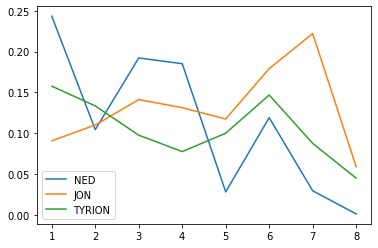

In [16]:
import matplotlib.pyplot as plt

#Etude comparative au cours des saisons
def centrality(graph):
    return nx.centrality.betweenness_centrality(graph)

def top_ten():
    for i in range(1,9):

        print(f'Etude des 10 noeuds les plus centraux de la saison {i}')
        graph = graph_from_file(f'data-GOT-EXT/got-s{i}-nodes.csv', f'data-GOT-EXT/got-s{i}-edges.csv')
        d = centrality(graph)
        topten = dict(sorted(d.items(), key=lambda item: item[1], reverse = True)[:10])
        i = 1 
        for pers in topten:
            print(f'{i} : {pers}, {topten[pers]}')
            i+=1

top_ten()

def evolution(liste):
    graphs_centrality = [centrality(graph_from_file(f'data-GOT-EXT/got-s{i}-nodes.csv', f'data-GOT-EXT/got-s{i}-edges.csv')) for i in range(1,9)]
    for name in liste:
        X = [i+1 for i in range(8)]
        Y = [graphs_centrality[i][name] for i in range(8)]
        plt.plot(X, Y, label=name)
    plt.legend()
    plt.show()

evolution(['NED', 'JON', 'TYRION'])

## Crawling a website for additional information
The dataset you used in the previous exercise is very interesting, but the nodes have very little information. However, we can find more information online about each character, if we follow the link assigned to each node. Each link get us to a webpage with a lot of information about this character. 
Let's crawl more information using the BeautifulSoup library that we saw last time. 

### Exercise
5. Write a function that given the page of a character, gets the content of the tag meta property="og:description". To understand better where the tag comes from, read about the Open Graph Protocol: https://ogp.me/
For example, for Jon Snow we want to retrieve the following content. Note that the description might be missing for some characters. 


In [17]:
## Solution for the Exercise 5
import requests
from bs4 import BeautifulSoup

def get_character_description(url):
    
    # Step 1: Fetch the webpage content
    response = requests.get(url)
    if response.status_code == 200:
        # Step 2: Parse the content using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Step 3: Find the meta tag with property="og:description"
        meta_tag = soup.find('meta', property='og:description')
        
        # Step 4: Extract and return the content of the meta tag
        if meta_tag and meta_tag.get('content'):
            return meta_tag.get('content')
    else:
        print("Failed to fetch the page")


# Example usage:
url = "https://gameofthrones.fandom.com/wiki/Jon_Snow"  # Replace with the actual URL of the character page
description = get_character_description(url)
print(description)

You've got the North in you. The real North.Tormund Jon Snow, born Aegon Targaryen,[d] is the son of Lyanna Stark and Rhaegar Targaryen, the late Prince of Dragonstone. From infancy, Jon is presented as the bastard son of Lord Eddard Stark, Lyanna's brother, and raised alongside Eddard's lawful children at Winterfell. Jon's true parentage is kept secret from everyone, including Jon himself, in order to protect him from those that sought the complete annihilation of House Targaryen. Jon joins the


### Kmeans and TFIDF

We now have a data graph, let's try to run k-means on it. First let's see an example on how to do it! We will use the functions 
- TFIDF for computing a vector representation of text: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer
- kmeans for computing a clustering on the vectors obtained: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- and the silhouette score to see which value of k to choose (we pick the k that maximizes the silhouette score): https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html


Check the output of the code below! First, see how the TDIDF vectors are computer, when do we have 0 in a dimension?

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import numpy as np

corpus = [

    "Cats are more independent animals.",

    "Cats are easiers to take care of.",

    "Monkeys are very smart.",

    "Dogs are human's best friend.",
    
    "Dogs are runners.",

]

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out())

a = X.todense()
print(a)


for k in range(2,len(corpus)):
    print("number of clusters: "+ str(k))
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    print(silhouette_score(X, kmeans.labels_))
    print(kmeans.labels_)

### Exercise

6. Run kmeans on the description of the characters, by keeping only characters for which you could retrieve a description. Find the best k using the silhouette score. 

# Graph visualization in Python
Now that we are more familiar with graphs, let's try to visualize them! In the past, we have used Gephi: https://github.com/gephi/gephi
It is still an option, however, it is no longer regularly maintained. Given this, in this lab we will explore ipysigma, a visualization library created by Medialab in Sciences Po: https://github.com/medialab/ipysigma Go through the tutorial on the page of the ipysigma library.  

### Citation graph visualization in ipysigma
In networkx we can create graphs ourselves, but we can also read it from the disk - for example from a CSV file as you saw before, but also from files in the format gexf. Read more about it here: https://networkx.org/documentation/stable/reference/readwrite/gexf.html  In the TP we share a graph in this format called Decodex. It was created by Le Monde and contains information about news websites, their level of reliability and how they cite each other. For example, Le Monde is a node in this graph, with the properties seen below. The graph contains also edges with weights, with the source node being the citing website and the target note the cited website.

You can find it yourself if you open the file in a text editor. You will observe that it is written in XML, a format that is similar to HTML. 
The nodes in this graph can have the reliability score of ["Parodique", "Douteux", "Peu fiable", "Plutôt fiable"] 

### Creating node partitions and using colors for analysis

Below we show how to create a complex visualization using ipysigma. We first partition the nodes according to their reliability (fiabilité) and also we give them colors according to the same attribute. 
Then we give edges colors according to the color of the target node. We position the nodes according to the partitions they belong to.
Like this, we can see how communities cite each other. We also set the size of the nodes to be proportional to their Pagerank score.
Note that the library is under development and sometimes the documentation might not be sufficiently clear. Try looking if your problem is also not mentioned in the issues of the libraries on Github: https://github.com/medialab/ipysigma/issues 
If you do not see it, but think your code should still be correct according to their instructions, create a new issue!

Note that you can click on nodes in the ipysigma visualization.

In [ ]:
# Importing a gexf graph
g = nx.read_gexf('./Decodex.gexf')
fiabilite_categories = ["Parodique", "Douteux", "Peu fiable", "Plutôt fiable"]
colors = {
    "Peu fiable": "#E74C3C",       # Red
    "Douteux": "#F1C40F",    # Yellow
    "Parodique": "#2ECC71",      # Green
    "Plutôt fiable": "#3498DB",  # Blue
    "Unknown": "#95A5A6"
    
}

partitions = {"Parodique": [], "Douteux": [], "Peu fiable": [], "Plutôt fiable": []}

# Assign colors based on 'fiabilité' attribute (if it exists)
for node in g.nodes:
    fiabilite = g.nodes[node].get("fiabilité", "Unknown")  # Default to "medium"
    g.nodes[node]["color_node"] = colors.get(fiabilite, "#95A5A6")  # Gray if unknown
    g.nodes[node]["size"] = 10  # Set a default size
    partitions[fiabilite].append(node)


# Assign edge colors based on the target node’s color
for source, target in g.edges:
    g.edges[source, target]["color_edge"] = g.nodes[target]["color_node"]


layout = {}
grid_positions = {
    "Peu fiable": (-2, -2),
     "Douteux": (-2, 2),
    "Parodique": (2, -2),
    "Plutôt fiable": (2, 2)
}

for category, nodes in partitions.items():
    base_x, base_y = grid_positions[category]
    angle_step = 2 * np.pi / max(1, len(nodes)) 
    radius = 1.5  # Spread out the nodes

    for i, node in enumerate(nodes):
        angle = i * angle_step
        layout[node] = {
            "x": base_x + radius * np.cos(angle),
            "y": base_y + radius * np.sin(angle)
        }

# Visualize with ipysigma
sigma = Sigma(
    g,
    raw_node_color="color_node",
    raw_edge_color="color_edge",
    layout=layout,
    node_label="label",
    default_edge_type="curve",
    node_border_color_from="node",
    label_font="cursive",
    node_size=nx.pagerank(g)
)

sigma

### Exercises
7. How do reliable sources of information interact with untrusted sources in the Decoders graph, who is citing whom? 
Give a short explanation based on the above visualization.
8. How do the types of information sources interact with each other in the Decoders graph? To observe this, create a similar visualization as the above, but this type using the attribute "catégorie".
9. How does the citation network look like when we consider the political orientation of the websites? For this use the attribute "orientation contenu".
10. How does the citation network look like when we use finer partitions, for examples partitions where we have two dimensions, the reliability of the content and the political orientation?

In [ ]:
# Solutions for the exercises above


## Read a research article that investigates the potential of using modularity to detect polarization

You will find on Moodle a research article published at the conference ICWSM https://www.icwsm.org/2025/index.html
Take the time to read it and see how researchers test ideas on real applications and propose new metrics when they consider existing tools are not sufficient. In your project you will also have to investigate your hypothesis on the data of your choice! 

11. After reading the article, implement the notion of boundary described. Apply it on one of the graphs you have seen so far in this class, or on one graph from here (choose smaller graphs for efficiency): http://snap.stanford.edu/data/index.html


In [ ]:
# Solution for exercise 10